<a href="https://colab.research.google.com/github/auromaa-2004/Linear_Reg/blob/main/Marketing_and_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Dummy Data HSS.csv")

In [ ]:
df.shape

(4572, 5)

In [ ]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
df=df.dropna().reset_index(drop=True)

In [ ]:
df.shape

(4546, 5)

In [ ]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
df.drop(["Influencer"],axis=1,inplace=True)

KeyError: "['Influencer'] not found in axis"

In [ ]:
df.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [ ]:
df.shape

(4546, 4)

In [ ]:
#differentiating features into independent and dependent features
# X=df[["TV","Radio","Social Media"]]
Y=df["Sales"]
X=df.drop(["Sales"],axis=1,inplace=True)

In [ ]:
X=df

In [ ]:
X

,TV,Radio,Social Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998
...,...,...,...
4541,26.0,4.472360,0.717090
4542,71.0,20.610685,6.545573
4543,44.0,19.800072,5.096192
4544,71.0,17.534640,1.940873


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=8)

In [ ]:
#standardising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
#check for collinearity
x_train.corr()

,TV,Radio,Social Media
TV,1.000000,0.867256,0.530862
Radio,0.867256,1.000000,0.606448
Social Media,0.530862,0.606448,1.000000


In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=lin.predict(x_test_scaled)

In [ ]:
#checking performance matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r2)
print(mae)
print(mse)

0.9990416907882899
2.3360132303606043
8.497633854985603


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
val=cross_val_score(lin,x_train_scaled,y_train)
vals=np.mean(val)
print(vals)

0.9989793429000778


In [ ]:
#lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r2)
print(mae)
print(mse)

0.9990416907882899
2.3360132303606043
8.497633854985603


In [ ]:
#ridge
from sklearn.linear_model import Ridge
Ridge=Ridge()
Ridge.fit(x_train_scaled,y_train)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r2)
print(mae)
print(mse)

0.9990416907882899
2.3360132303606043
8.497633854985603


In [ ]:
#elasticNet
from sklearn.linear_model import ElasticNet
ElasticNet=ElasticNet()
ElasticNet.fit(x_train_scaled,y_train)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r2)
print(mae)
print(mse)

0.9990416907882899
2.3360132303606043
8.497633854985603


In [ ]:
#hyperparamter tuning(lasso)
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_lasso_pred=lassocv.predict(x_test_scaled)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(r2)
print(mae)
print(mse)

0.9990416907882899
2.3360132303606043
8.497633854985603


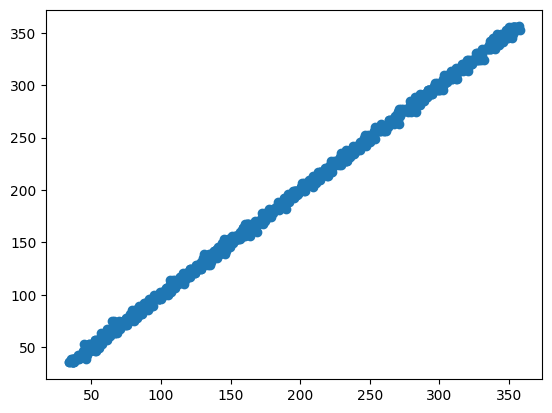

In [ ]:
#Assumptions
plt.scatter(y_test,y_pred)

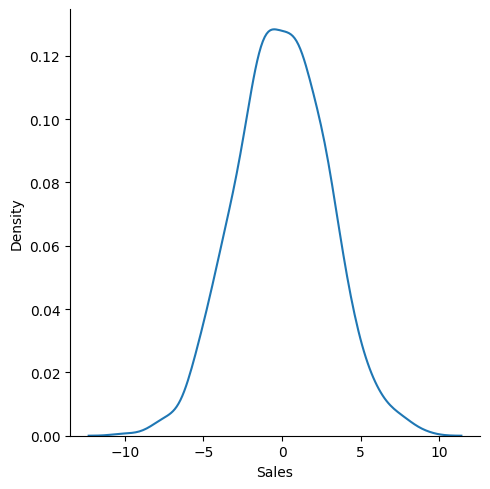

In [ ]:
residuals=y_test-y_pred
sns.displot(residuals,kind="kde")

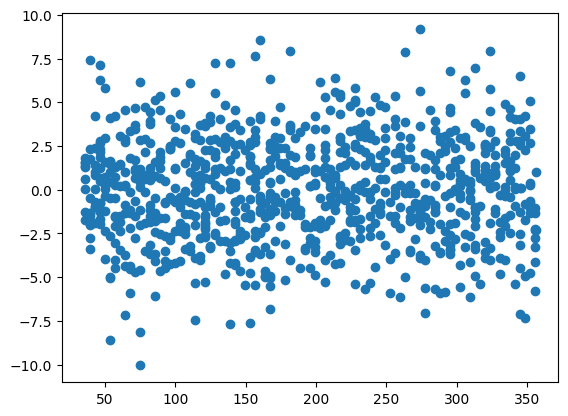

In [ ]:
plt.scatter(y_pred,residuals)